# TAREA PCA 

## Ralphy Núñez Mercado

### ⬇️ Imports necesarios  

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error ,r2_score, classification_report,mean_absolute_error,confusion_matrix
import numpy as np

### Preparar el dataset 

In [16]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###  📈 Mapa de calor

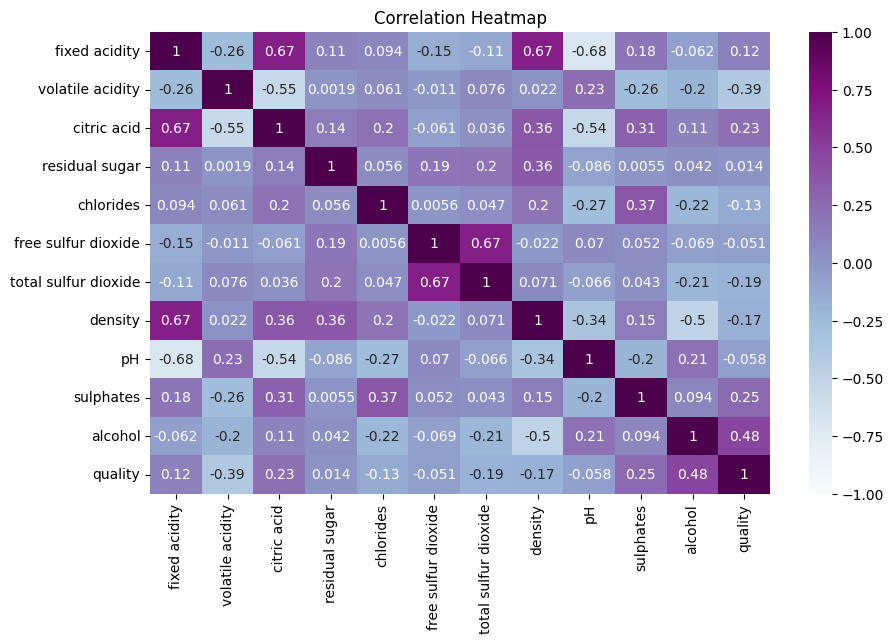

In [17]:

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

### ➗ Dividir los datos

In [18]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

# Convertimos los valores de la columna calidad a binario dependiendo de si es buena o mala calidad, 
# poniendo como baremo que si es 6 o mayor se considera una buena calidad 
y = y.apply(lambda x: 1 if x >= 6 else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

### ↕️ Estandarizar los datos

In [19]:
sc = StandardScaler()
X_train_escalado = sc.fit_transform(X_train)
X_test_escalado = sc.transform(X_test)

### 📊 Gráfica Varianza 

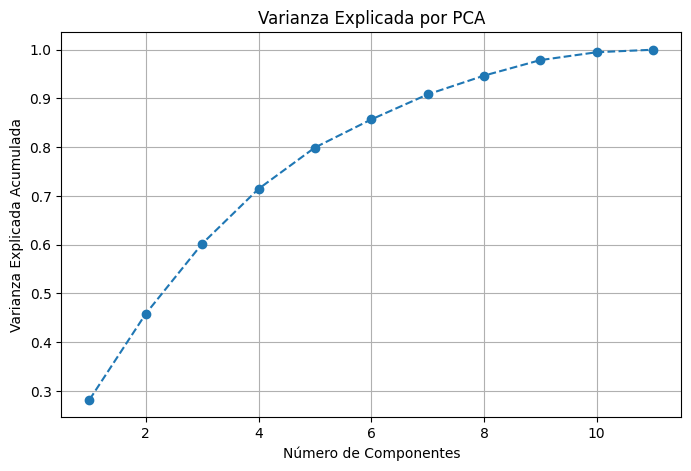

In [20]:

pca = PCA()
pca.fit(X_train_escalado)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()

### ➡️ Aplicar PCA manteniendo el 95% de la varianza


In [21]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_escalado)
X_test_pca = pca.transform(X_test_escalado)

### ⚙️ SVC - Entrenear los modelos con diferentes kernels

In [22]:
svc_linear = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))
svc_linear.fit(X_train_pca, y_train)

svc_poly = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly'))
svc_poly.fit(X_train_pca, y_train)

svc_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf'))
svc_rbf.fit(X_train_pca, y_train)

svc_sigmoid = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='sigmoid'))
svc_sigmoid.fit(X_train_pca, y_train)

y_pred_linear = svc_linear.predict(X_test_pca)
y_pred_poly = svc_poly.predict(X_test_pca)
y_pred_rbf = svc_rbf.predict(X_test_pca)
y_pred_sigmoid = svc_sigmoid.predict(X_test_pca)

###  📈 SVC - Mostrar las métricas de los diferentes kernels

In [23]:
print("SVC KERNEL LINEAR")
print(classification_report(y_test,y_pred_linear))

print("SVC KERNEL POLY")
print(classification_report(y_test,y_pred_poly))

print("SVC KERNEL RBF")
print(classification_report(y_test,y_pred_rbf))

print("SVC KERNEL SIGMOID")
print(classification_report(y_test,y_pred_sigmoid))


SVC KERNEL LINEAR
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       133
           1       0.82      0.74      0.78       187

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320

SVC KERNEL POLY
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       133
           1       0.83      0.69      0.75       187

    accuracy                           0.74       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.76      0.74      0.74       320

SVC KERNEL RBF
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       133
           1       0.83      0.78      0.81       187

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.79  

Como vemos el mejor kernel para este dataframe es el linear

###  📈 SVC - Matriz de confusión

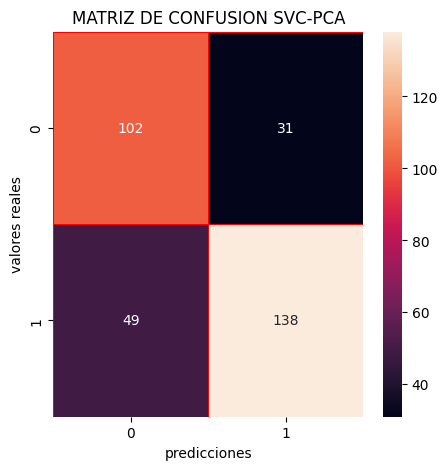

In [24]:
cm= confusion_matrix(y_test,y_pred_linear) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION SVC-PCA")
plt.show()

# NO USANDO PCA

### Preparar el dataframe

In [25]:
df = pd.read_csv('winequality-red.csv')

df['calidad_binario'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['calidad_binario']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

sc = StandardScaler()
X_train_escalado = sc.fit_transform(X_train)
X_test_escalado = sc.transform(X_test)

### ⚙️ Entrenear los modelos con diferentes kernels

In [26]:
svc_linear = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
svc_linear.fit(X_train_escalado, y_train)

svc_poly = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))
svc_poly.fit(X_train_escalado, y_train)

svc_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
svc_rbf.fit(X_train_escalado, y_train)

svc_sigmoid = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))
svc_sigmoid.fit(X_train_escalado, y_train)

y_pred_linear = svc_linear.predict(X_test_escalado)
y_pred_poly = svc_poly.predict(X_test_escalado)
y_pred_rbf = svc_rbf.predict(X_test_escalado)
y_pred_sigmoid = svc_sigmoid.predict(X_test_escalado)

###  📈 Mostrar las métricas de los diferentes kernels

In [27]:
print("SVC KERNEL LINEAR")
print(classification_report(y_test,y_pred_linear))

print("SVC KERNEL POLY")
print(classification_report(y_test,y_pred_poly))

print("SVC KERNEL RGF")
print(classification_report(y_test,y_pred_rbf))

print("SVC KERNEL SIGMOID")
print(classification_report(y_test,y_pred_sigmoid))

SVC KERNEL LINEAR
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       133
           1       0.80      0.75      0.78       187

    accuracy                           0.75       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.75      0.75       320

SVC KERNEL POLY
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       133
           1       0.84      0.74      0.79       187

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320

SVC KERNEL RGF
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       133
           1       0.83      0.81      0.82       187

    accuracy                           0.79       320
   macro avg       0.78      0.79      0.79       320
weighted avg       0.79  

###  📈 Matriz de confusion

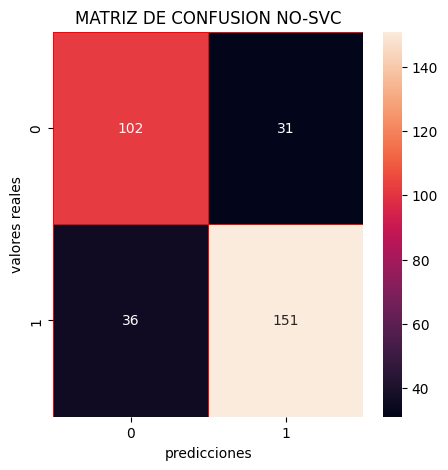

In [28]:
cm= confusion_matrix(y_test,y_pred_rbf) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION NO-SVC")
plt.show()


# Conclusiones:

### Al retener tanta varianza, el modelo tendra prácticamente la misma información que el dataset original por lo que no mejora el rendimiento del modelo utilizando PCA.
### Además al final lo he hecho con 90 en vez de 95 ya que otorga mejores resultados
### Con esto dicho, sin PCA, mejora muy poco.